Single-threaded hashing performance with

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
file_name = "Fedora-Workstation-Live-x86_64-33-1.2.iso"
file_size = 9599713280

```
for i in {1..8}; do 
    rm *.torrent;
    time mktorrent -t$i -l20 \
    CentOS-Stream-8-x86_64-20201211-dvd1.iso > /dev/null;
done
```

In [139]:
mktorrent = [9.511, 5.078, 3.480, 2.704, 2.751, 2.906, 2.762, 2.535]

In [140]:
# imdl has no multi-threading support
imdl = [18.276] * 8

```
for i in {1..8}; do rm *.torrent;  
    time mktor --chunk-min=1M --chunk-max=1M \
    CentOS-Stream-8-x86_64-20201211-dvd1.iso \
    https://test/url/announce > /dev/null; 
done
```

In [141]:
pyrocore = [11.574] * 8

```
time dottorrent --piece_size 1M CentOS-Stream-8-x86_64-20201211-dvd1.iso out.torrent
```

In [150]:
transmission_create = [10.506] * 8

In [143]:
dottorrent_cli = [15.148] * 8

```
for i in {1..8}; do 
    rm *.torrent;
    time torrenttools-release create -t$i -l20 \
    CentOS-Stream-8-x86_64-20201211-dvd1.iso > /dev/null;
done
```

In [144]:
torrenttools_openssl = [10.112, 5.116, 4.208, 3.213, 3.315, 3.308, 3.311, 3.412]

```
for i in {1..8}; do 
    rm *.torrent;
    time torrenttools-isal-release create -t$i -l20 \
    CentOS-Stream-8-x86_64-20201211-dvd1.iso > /dev/null;
done
```

In [145]:
torrenttools_isal = [4.139, 2.111, 2.210, 2.211, 2.309, 2.313, 2.412, 2.412]

In [151]:
duration = pd.DataFrame(
    [mktorrent, imdl, pyrocore, dottorrent_cli, transmission_create, torrenttools_openssl, torrenttools_isal], 
    index=["mktorrent", "imdl", "pyrocore", "dottorrent-cli", "transmission-create", "torrenttools (OpenSSL)", "torrenttools (Intel ISA-L)"], 
    columns=list(range(1, 9))).stack()
duration.index = duration.index.set_names(["program", "threads"])

In [152]:
df = pd.DataFrame({"duration": duration, "speed": file_size / duration / 1e6})

In [153]:
df.index.unique(level=0)

Index(['mktorrent', 'imdl', 'pyrocore', 'dottorrent-cli',
       'transmission-create', 'torrenttools (OpenSSL)',
       'torrenttools (Intel ISA-L)'],
      dtype='object', name='program')

Text(0.5, 1.0, 'Performance')

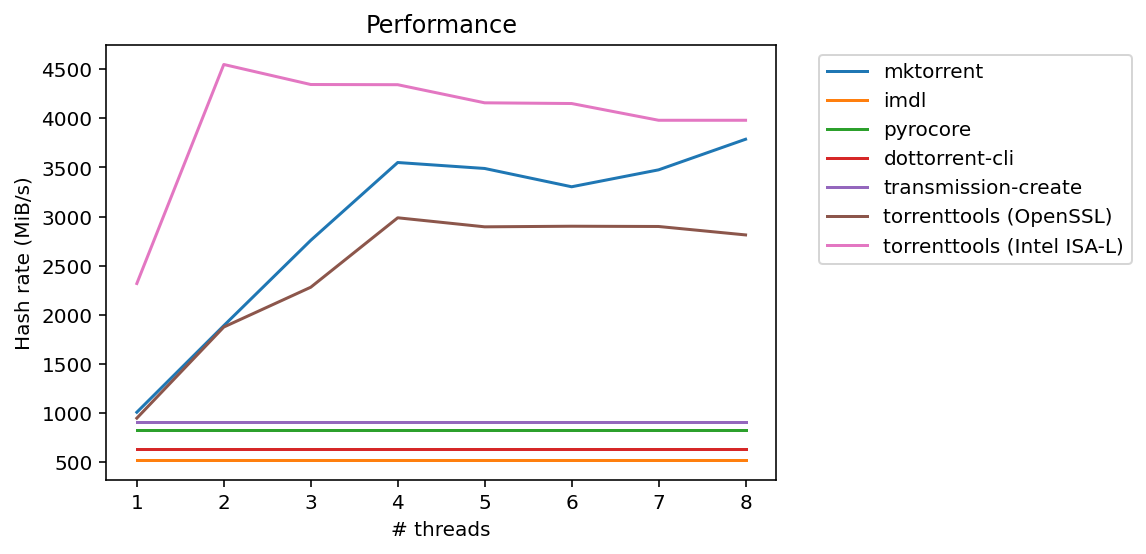

In [154]:
import matplotlib.cm
fig, ax = plt.subplots(1, 1)

programs = df.index.unique(level=0)
# viridis = matplotlib.cm.get_cmap('viridis', len(programs))


for idx, program in enumerate(programs):
    # print(idx)
    ax.plot(df.loc[program, "speed"])

ax.set_xlabel("# threads")
ax.set_ylabel("Hash rate (MiB/s)")
ax.legend(programs, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title("Performance")